# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
!pip install citipy

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import time
from scipy.stats import linregress
import json
import datetime
from citipy import citipy

# Import API key
from config import weather_key

## Generate Cities List

In [5]:
# Latitude and longitute combination points

lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lat, lngs)
lat_lngs

In [6]:
# City list.
cities = []

# City for loop
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    if city not in cities:
        cities.append(city)

# City count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_key

In [8]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    target_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(target_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kushiro
Processing Record 2 of Set 1 | bulawayo
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | lensk
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | pechenga
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | fatwa
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | tura
Processing Record 13 of Set 1 | bud
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | baghdad
Processing Record 16 of Set 1 | wagga wagga
Processing Record 17 of Set 1 | repnoye
Processing Record 18 of Set 1 | malwan
City not found. Skipping...
Processing Record 19 of Set 1 | rovaniemi
Processing Record 20 of Set 1 | amderma
City not found. Skipping...
Processing Record 21 of Set 1 | vostok
Processing Record 22 of Set 1 | mezen
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
len(city_data)

553

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kushiro,42.9750,144.3747,291.92,97,100,4.76,JP,2021-07-27 04:04:10
1,Bulawayo,-20.1500,28.5833,278.67,74,0,4.47,ZW,2021-07-27 04:02:46
2,Kodiak,57.7900,-152.4072,287.43,76,44,2.31,US,2021-07-27 04:03:17
3,Hobart,-42.8794,147.3294,290.07,54,75,1.79,AU,2021-07-27 04:01:58
4,New Norfolk,-42.7826,147.0587,289.87,55,69,2.68,AU,2021-07-27 04:04:13
5,Lensk,60.7253,114.9278,305.56,28,4,2.93,RU,2021-07-27 04:04:14
6,Bethel,41.3712,-73.4140,296.28,87,1,1.48,US,2021-07-27 04:03:18
7,Pechenga,69.5259,31.1703,282.63,78,20,1.46,RU,2021-07-27 04:04:15
8,Rikitea,-23.1203,-134.9692,296.99,79,99,8.33,PF,2021-07-27 04:03:07
9,Fatwa,25.5167,85.3167,299.20,63,100,1.92,IN,2021-07-27 04:04:17


In [51]:
city_data_df.to_csv('city_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [17]:
# Reorder the columns in the order you want them to appear.
new_layout = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

# Assign a new or the same DataFrame the new column order.
city_data_df_new_layout = city_data_df[new_layout]
city_data_df_new_layout.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kushiro,JP,2021-07-27 04:04:10,42.9750,144.3747,291.92,97,100,4.76
1,Bulawayo,ZW,2021-07-27 04:02:46,-20.1500,28.5833,278.67,74,0,4.47
2,Kodiak,US,2021-07-27 04:03:17,57.7900,-152.4072,287.43,76,44,2.31
3,Hobart,AU,2021-07-27 04:01:58,-42.8794,147.3294,290.07,54,75,1.79
4,New Norfolk,AU,2021-07-27 04:04:13,-42.7826,147.0587,289.87,55,69,2.68
5,Lensk,RU,2021-07-27 04:04:14,60.7253,114.9278,305.56,28,4,2.93
6,Bethel,US,2021-07-27 04:03:18,41.3712,-73.4140,296.28,87,1,1.48
7,Pechenga,RU,2021-07-27 04:04:15,69.5259,31.1703,282.63,78,20,1.46
8,Rikitea,PF,2021-07-27 04:03:07,-23.1203,-134.9692,296.99,79,99,8.33
9,Fatwa,IN,2021-07-27 04:04:17,25.5167,85.3167,299.20,63,100,1.92


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

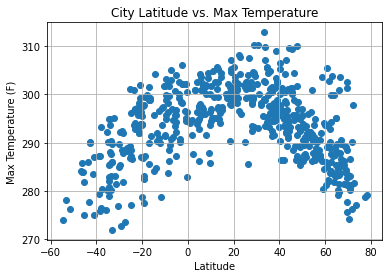

In [26]:
# Build a scatter plot for each data type
plt.scatter(city_data_df_new_layout["Lat"], city_data_df_new_layout["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_MaxTemperature.png")

# Show plot
plt.show()


## Latitude vs. Humidity Plot

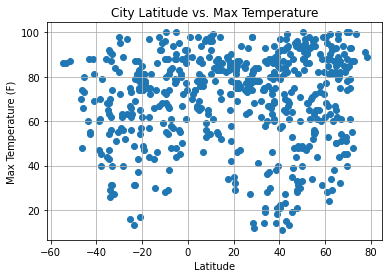

In [27]:
# Build a scatter plot for each data type
plt.scatter(city_data_df_new_layout["Lat"], city_data_df_new_layout["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_MaxTemperature.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

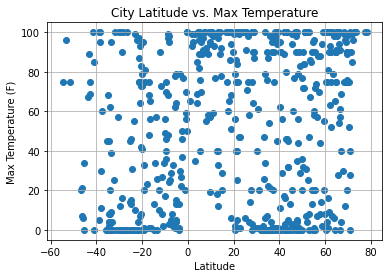

In [31]:
# Build a scatter plot for each data type
plt.scatter(city_data_df_new_layout["Lat"], city_data_df_new_layout["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_MaxTemperature.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

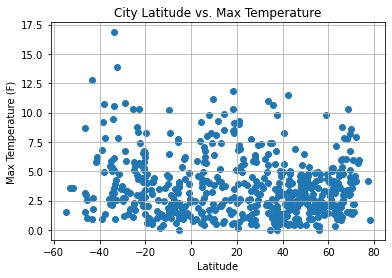

In [32]:
# Build a scatter plot for each data type
plt.scatter(city_data_df_new_layout["Lat"], city_data_df_new_layout["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_MaxTemperature.png")

# Show plot
plt.show()

## Linear Regression

In [35]:
#Northern Hemisphere and Southern Hemisphere Data 

north_hemisphere = city_data_df_new_layout.loc[city_data_df_new_layout['Lat'] > 0]
south_hemisphere = city_data_df_new_layout.loc[city_data_df_new_layout['Lat'] < 0]

In [39]:
north_hemisphere.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kushiro,JP,2021-07-27 04:04:10,42.9750,144.3747,291.92,97,100,4.76
2,Kodiak,US,2021-07-27 04:03:17,57.7900,-152.4072,287.43,76,44,2.31
5,Lensk,RU,2021-07-27 04:04:14,60.7253,114.9278,305.56,28,4,2.93
6,Bethel,US,2021-07-27 04:03:18,41.3712,-73.4140,296.28,87,1,1.48
7,Pechenga,RU,2021-07-27 04:04:15,69.5259,31.1703,282.63,78,20,1.46


In [40]:
south_hemisphere.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bulawayo,ZW,2021-07-27 04:02:46,-20.1500,28.5833,278.67,74,0,4.47
3,Hobart,AU,2021-07-27 04:01:58,-42.8794,147.3294,290.07,54,75,1.79
4,New Norfolk,AU,2021-07-27 04:04:13,-42.7826,147.0587,289.87,55,69,2.68
8,Rikitea,PF,2021-07-27 04:03:07,-23.1203,-134.9692,296.99,79,99,8.33
10,Punta Arenas,CL,2021-07-27 04:02:57,-53.1500,-70.9167,278.21,86,96,3.60


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

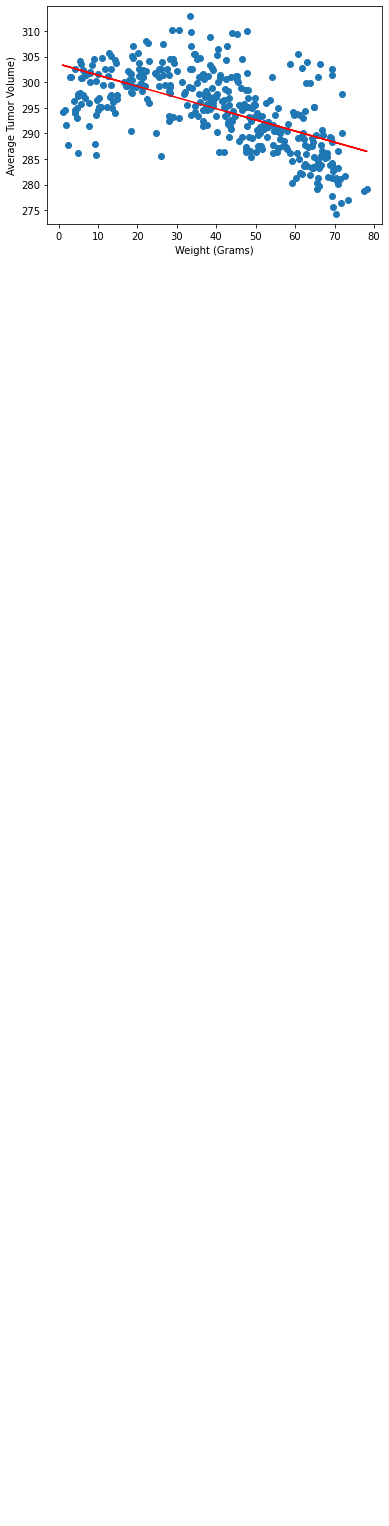

In [42]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Weight (Grams)')
plt.ylabel('Average Tumor Volume)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

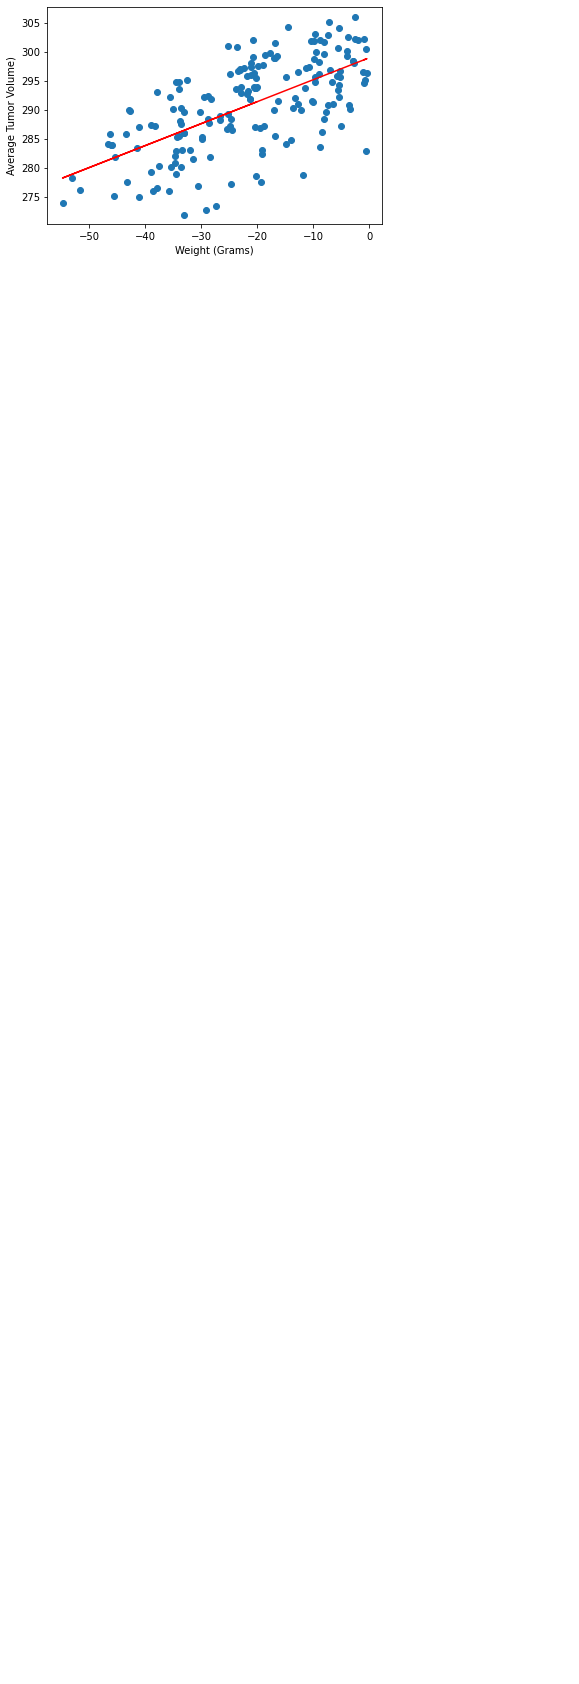

In [47]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Weight (Grams)')
plt.ylabel('Average Tumor Volume)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

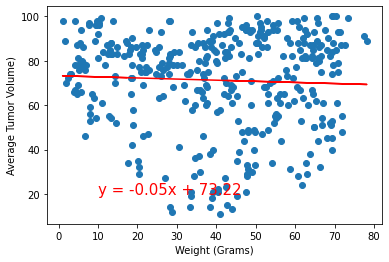

In [44]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Weight (Grams)')
plt.ylabel('Average Tumor Volume)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

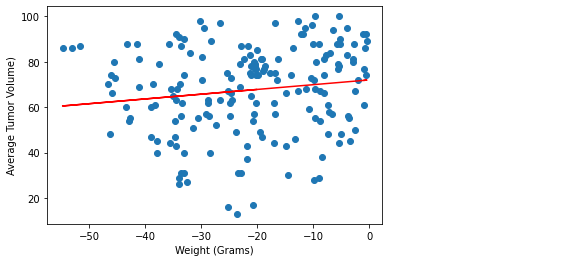

In [48]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Weight (Grams)')
plt.ylabel('Average Tumor Volume)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

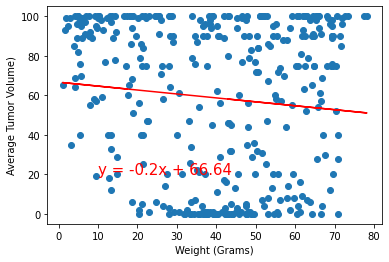

In [45]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Weight (Grams)')
plt.ylabel('Average Tumor Volume)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

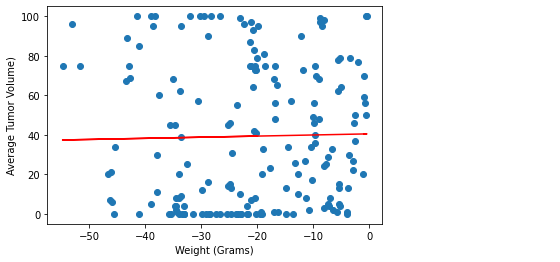

In [49]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Weight (Grams)')
plt.ylabel('Average Tumor Volume)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

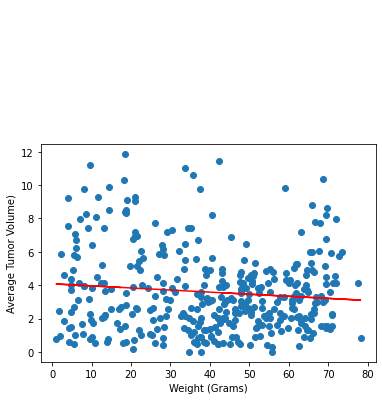

In [46]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Weight (Grams)')
plt.ylabel('Average Tumor Volume)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

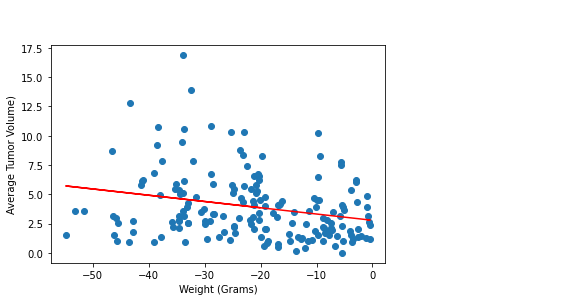

In [50]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Weight (Grams)')
plt.ylabel('Average Tumor Volume)')
plt.show()